In [ ]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random

Aim: To classify handwritten numbers (0 to 9).

In [ ]:
#Data set:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
#Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0
print('Pixels are normalized')

Pixels are normalized


In [ ]:
#Shape of images:
print('Shape of train images', train_images.shape)
print('Shape of test images',test_images.shape)


Shape of train images (60000, 28, 28)
Shape of test images (10000, 28, 28)


The image is 28 x 28 x 3.


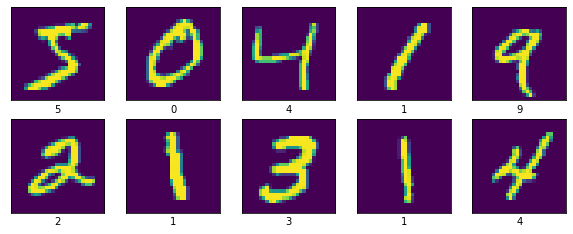

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

In [ ]:
#CNN model to classify the handwritten numbers:

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)), #as the color does not matter here
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.33),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1744 - accuracy: 0.9462 - val_loss: 0.0520 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0290 - val_accuracy: 0.9896
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0407 - accuracy: 0.9865 - val_loss: 0.0366 - val_accuracy: 0.9875


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

313/313 - 3s - loss: 0.0290 - accuracy: 0.9896


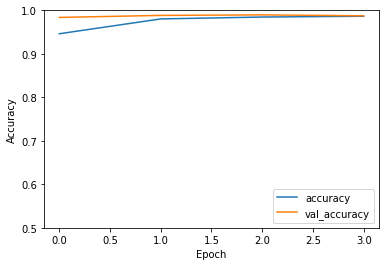

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)



In [ ]:
history.history['val_accuracy']

[0.9837999939918518, 0.9883999824523926, 0.9896000027656555, 0.987500011920929]